In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def plot_diff(imgs,titles):
    n = len(imgs)
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(imgs[i],cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

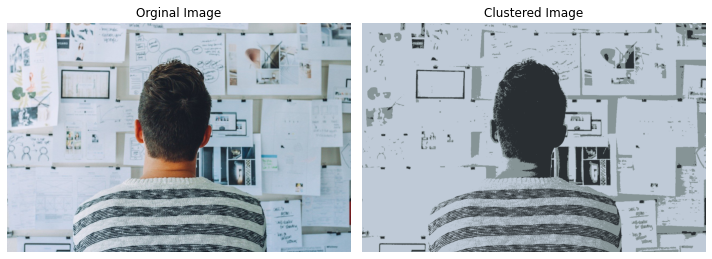

In [3]:
image = plt.imread('imgs/man-thinking.jpg')
pixel_vals = image.reshape((-1,3)).astype(np.float32)

k = 3 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

retval, labels, centers = cv2.kmeans(
    pixel_vals, k, None, 
    criteria, 10, cv2.KMEANS_RANDOM_CENTERS
)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape((image.shape))

plot_diff([image,segmented_image],["Orginal Image","Clustered Image"])